In [1]:
### Evaluates the trained model using a set of fresh data in data_to_verify/ ####

import tensorflow as tf
import numpy as np
print(tf.__version__)

2.2.0


In [2]:
model = tf.keras.models.load_model("20200815model.h5")

In [3]:
train_datasets = np.load('/home/junkai/3D_v1.0/202008150856test_dataset.npz')
X = train_datasets[train_datasets.files[0]]
T = train_datasets[train_datasets.files[1]]

In [4]:
ypred = model.predict(X)
probability = ypred.flatten()
T.shape
probability.shape

(60500,)

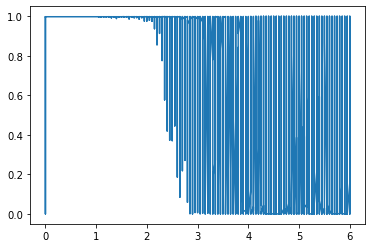

In [5]:
import matplotlib.pyplot as plt
plt.plot(T, probability)

In [6]:
smoothed_prob =[]
for i in range(len(probability))[::500]:
    ans=np.sum(probability[i:i+500])/500
    smoothed_prob.append(ans)

Tini=0.0
Tlast=6.0
T = np.linspace(Tini,Tlast,len(smoothed_prob))

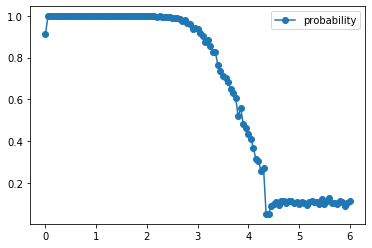

In [7]:
plt.plot(T, smoothed_prob, '-o',label='probability')
plt.legend()

# check codes

In [100]:
### Evaluates the trained model using a set of fresh data in data_to_verify/ ####

import tensorflow as tf
import numpy as np
print(tf.__version__)
model = tf.keras.models.load_model("saved_model/2DIsing")

2.1.0


In [101]:
import os
list1 = os.listdir("data_to_verify/")
yres = []

for i in range(len(list1)):
    if i == 0:
        xres = np.loadtxt("data_to_verify/" + list1[i])
    elif i == 1:
        xtemp = np.loadtxt("data_to_verify/" + list1[i])
        xres = np.vstack(([xres] , [xtemp]))
    else:
        xtemp = np.loadtxt("data_to_verify/" + list1[i])
        xres = np.vstack((xres , [xtemp]))
    yres.append(i/10)

xres = (xres+1)/2
np.array(yres)

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 2.547e+02, 2.548e+02,
       2.549e+02])

In [105]:
ypred = model.predict(xres)

smooth_para_prob =[]
for i in range(len(ypred))[::50]:
    ans=np.sum(ypred[i:i+50,0])/50
    smooth_para_prob.append(ans)

smooth_ferro_prob =[]
for i in range(len(ypred))[::50]:
    ans=np.sum(ypred[i:i+50,1])/50
    smooth_ferro_prob.append(ans)    

Tini=0.0
Tlast=5.0
T = np.linspace(Tini,Tlast,len(smooth_ferro_prob))

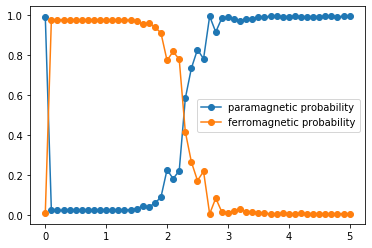

In [106]:
plt.plot(T, smooth_para_prob, '-o',label='paramagnetic probability')
plt.plot(T, smooth_ferro_prob, '-o',label='ferromagnetic probability')
plt.legend()

In [108]:
print(xres.shape,len(yres))

(2550, 10, 10) 2550


In [109]:
ypred = model.predict(xres)
ypred

array([[0.9897468 , 0.01025316],
       [0.9897468 , 0.01025316],
       [0.9897468 , 0.01025316],
       ...,
       [0.9924223 , 0.00757768],
       [0.99057627, 0.00942371],
       [0.99262756, 0.00737252]], dtype=float32)

In [116]:
import os
list1 = os.listdir("data_to_verify/")
yres = []

xres = np.loadtxt("data_to_verify/" + list1[0])
count=1
yres.append(count)

for i in list1[1:]:
    count+=1
    np.concatenate((xres,np.loadtxt("data_to_verify/" + i)))
    yres.append(count/10)

xres = (xres+1)/2
np.array(yres)

array([1.000e+00, 2.000e-01, 3.000e-01, ..., 2.548e+02, 2.549e+02,
       2.550e+02])

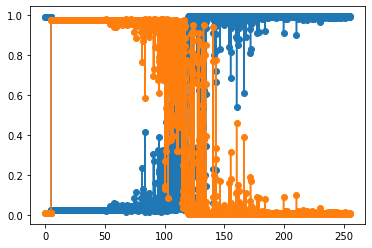

In [117]:
import matplotlib.pyplot as plt
plt.plot(yres[1:-1], ypred[:,0][1:-1], '-o')
plt.plot(yres[1:-1], ypred[:,1][1:-1], '-o')